# Labo 11
Détection de caractéristiques

In [6]:
import imageio.v3 as io
import numpy as np
import matplotlib.pyplot as plt
from skimage import measure
from skimage import data
from skimage.transform import resize
from scipy.signal import correlate2d

## Exercice 1 - Feature matching
Identifier un patch dans `img1` et l'associer à `img2` en utilisant la somme des différences carrées (SSD).

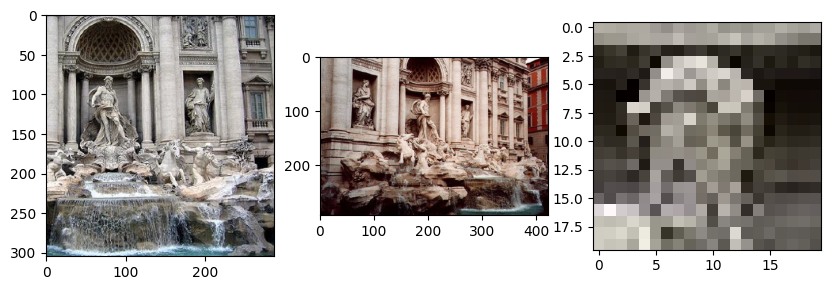

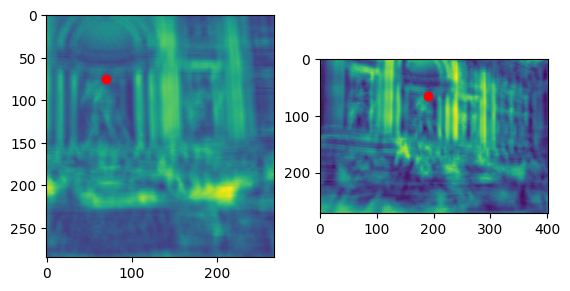

In [15]:
img1 = io.imread('statue1.PNG')
img2 = io.imread('statue2.PNG')

patch = img1[75:95,70:90]
plt.figure(figsize=(10,10))
plt.subplot(131); plt.imshow(img1)
plt.subplot(132); plt.imshow(img2)
plt.subplot(133); plt.imshow(patch)
plt.show()

def ssd(img, patch):
    res = np.zeros_like(img)
    _centre = patch.shape 
    centre = []
    centre.append(_centre[0])
    centre.append(_centre[1])
    centre = np.array(centre) // 2
    for i in range(centre[0], img.shape[0] - centre[0]):
        for j in range(centre[1], img.shape[1] - centre[1]):
            sub_img = img[i-centre[0]: i + centre[0],j-centre[1]: j + centre[1]]
            diff = sub_img - patch
            carre = np.pow(diff,2)
            somme = np.sum(carre)
            res[i,j] = somme
    return res

plt.figure(figsize=(10,10))
img_ssd = ssd(img1.mean(axis=2), patch.mean(axis=2))
img_ssd = img_ssd[patch.shape[0] //2 : img_ssd.shape[0] - patch.shape[0]//2,
    patch.shape[1] //2 : img_ssd.shape[1] - patch.shape[1]//2]

ligne, colonne = np.where(img_ssd == img_ssd.min())
plt.subplot(131); plt.imshow(img_ssd)
plt.plot(colonne, ligne, "ro")

img_ssd = ssd(img2.mean(axis=2), patch.mean(axis=2))
img_ssd = img_ssd[patch.shape[0] //2 : img_ssd.shape[0] - patch.shape[0]//2,
    patch.shape[1] //2 : img_ssd.shape[1] - patch.shape[1]//2]

ligne, colonne = np.where(img_ssd == img_ssd.min())
plt.subplot(132); plt.imshow(img_ssd)
plt.plot(colonne, ligne, "ro")

## Exercice 2 - Sift example
Exemple Sift avec opencv
https://www.analyticsvidhya.com/blog/2019/10/detailed-guide-powerful-sift-technique-image-matching-python/

J'aurais bien voulu le faire, mais il faut payer pour pouvoir utiliser l'algo Sift
```
Both SIFT and SURF authors require license fees for usage of their original algorithms
```

## Exercice 3 - Descripteur de Fourier
Aller chercher le contour de l'objet dans `img` en utilisant les descripteurs de Fourier

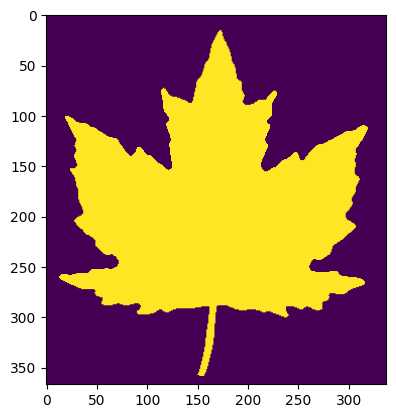

In [19]:
img = io.imread('leaf.png').mean(axis=2)
img[img <= img.min()] = 0
img[img > 0] = 1
img.astype(np.int8)

plt.imshow(img); plt.show()

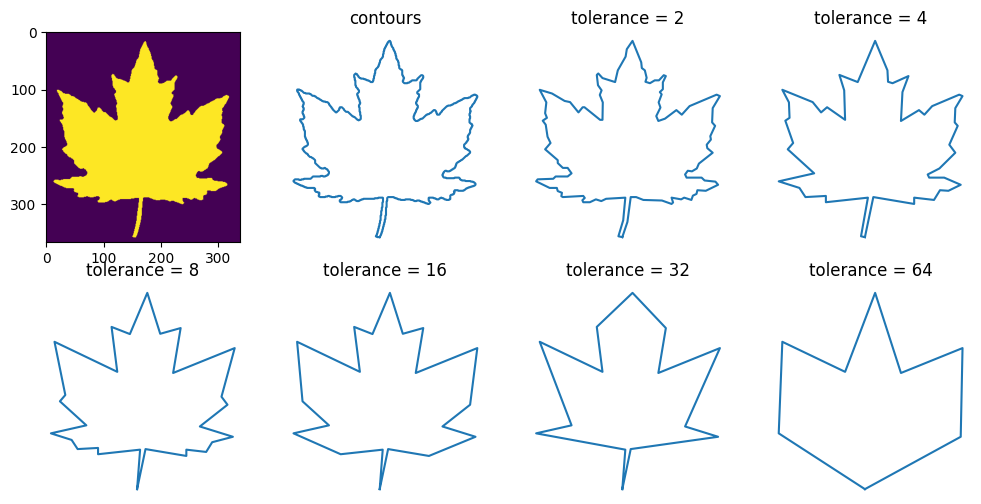

In [34]:
# Extraction de la frontière
contours = measure.find_contours(img)[0]

plt.figure(figsize=(12,6))
plt.subplot(241); plt.imshow(img)
plt.subplot(242); plt.plot(contours[:,1],contours[:,0]); plt.ylim(img.shape[0], 0); plt.axis("off");plt.title("contours")

tolerances = [2,4,8,16,32,64]

for indice, tolerance in enumerate(tolerances):
    polygone = measure.approximate_polygon(contours, tolerance=tolerance)
    plt.subplot(2,4,indice+3)
    plt.plot(polygone[:,1], polygone[:,0])
    plt.ylim(img.shape[0], 0)
    plt.axis("off")
    plt.title(f"tolerance = {tolerance}")

Text(0, 0.5, 'imag')

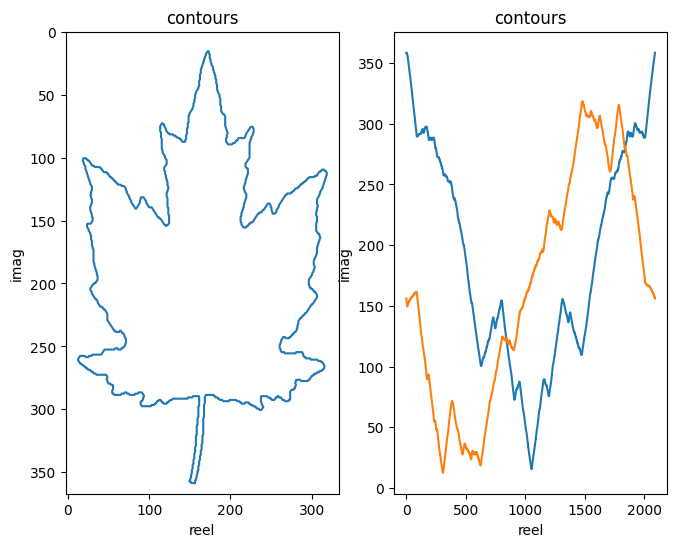

In [42]:
# Descripteur de Fourier

plt.figure(figsize=(12,6))
plt.subplot(131); plt.plot(contours[:,1],contours[:,0]); plt.ylim(img.shape[0], 0);plt.title("contours"); plt.xlabel("reel"); plt.ylabel("imag")

z = contours[:,0] + 1j * contours[:,1]

plt.subplot(132); plt.plot(z.real);  plt.plot(z.imag);plt.title("contours"); plt.xlabel("reel"); plt.ylabel("imag")

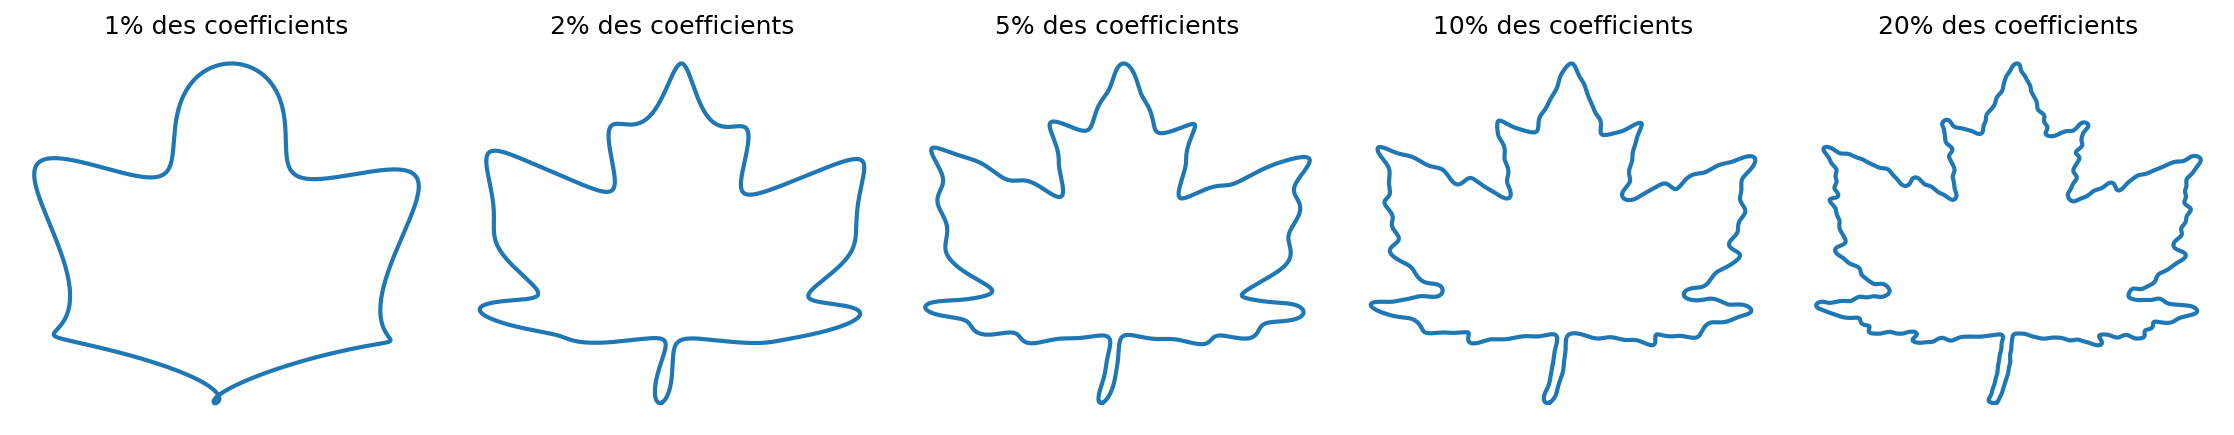

In [153]:
# Approximations
seuils = [0.005,0.01,0.025,0.05,0.1]
...